In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Online_Payment_Fraud_dataset.csv')

In [ ]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
237852,14,PAYMENT,21574.48,C1813138437,0.00,0.00,M2035350979,0.00,0.00,0.0,0.0
1678098,159,CASH_IN,27826.77,C1864482374,124.00,27950.77,C1302803707,10633697.49,10605870.72,0.0,0.0
1585791,155,PAYMENT,3583.57,C679574605,90780.24,87196.67,M1315382910,0.00,0.00,0.0,0.0
1097269,130,CASH_OUT,169827.31,C1433199757,0.00,0.00,C806696838,330579.78,500407.09,0.0,0.0
66828,9,CASH_OUT,319151.91,C273566461,0.00,0.00,C1375280409,625638.69,944790.60,0.0,0.0


In [ ]:
df.shape

(1738330, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738330 entries, 0 to 1738329
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 145.9+ MB


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.738329e+06,1.738329e+06,1.738329e+06,1.738329e+06,1.738329e+06,1.738329e+06,1.738329e+06,1738329.0
mean,7.244692e+01,1.626010e+05,8.595815e+05,8.808248e+05,9.950622e+05,1.117741e+06,1.060789e-03,0.0
std,5.789892e+01,2.697307e+05,2.924748e+06,2.960935e+06,2.306443e+06,2.405613e+06,3.255248e-02,0.0
min,1.000000e+00,6.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.800000e+01,1.319685e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,4.200000e+01,7.917917e+04,1.511800e+04,0.000000e+00,1.365656e+05,2.288219e+05,0.000000e+00,0.0
75%,1.360000e+02,2.186782e+05,1.232930e+05,1.660498e+05,9.460123e+05,1.157310e+06,0.000000e+00,0.0
max,1.610000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.220740e+07,4.220740e+07,1.000000e+00,0.0


In [ ]:
print(df['type'].unique())

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [ ]:
print(df['isFraud'].value_counts())

isFraud
0.0    1736485
1.0       1844
Name: count, dtype: int64


# Exploratory Data Analysis

type
CASH_OUT    619858
PAYMENT     579744
CASH_IN     382453
TRANSFER    144699
DEBIT        11575
Name: count, dtype: int64


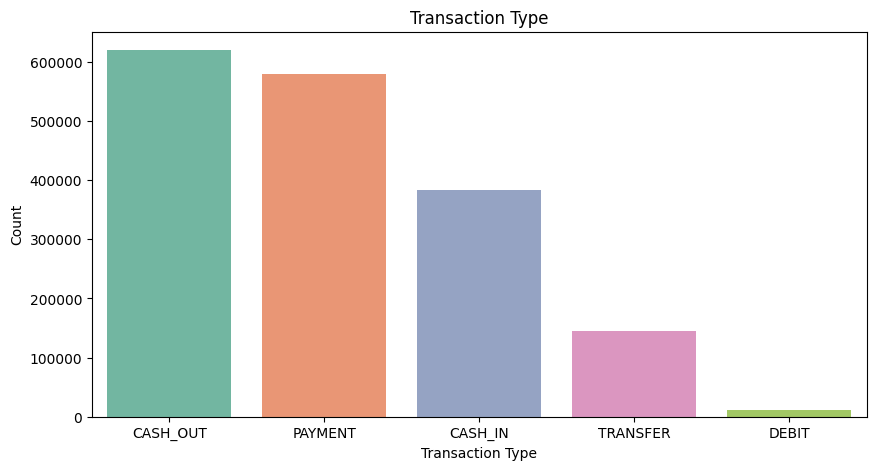

In [ ]:
type =df['type'].value_counts()
print(type)

plt.figure(figsize=(10, 5))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index, palette='Set2')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Transaction Type')
plt.show()

###  Above we can see The most common transaction types columns are PAYMENT, followed by CASH_OUT and TRANSFER.

isFraud
0.0    1736485
1.0       1844
Name: count, dtype: int64


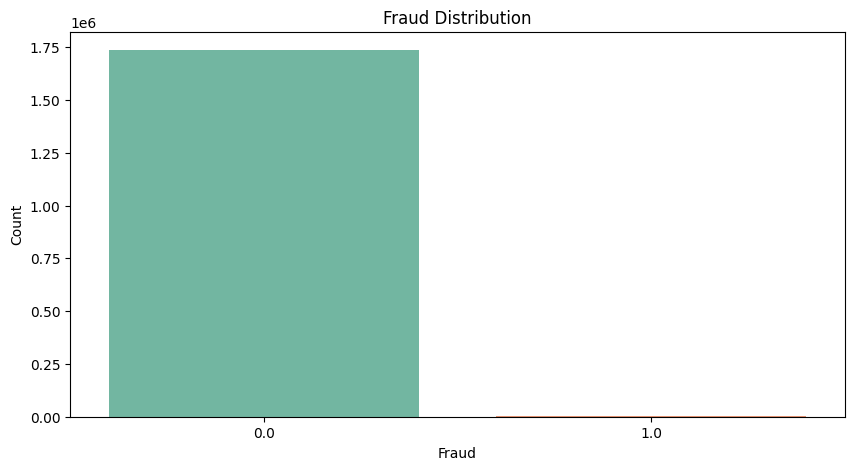

In [ ]:
fraud = df['isFraud'].value_counts()
print(fraud)

plt.figure(figsize=(10, 5))
sns.countplot(x='isFraud', data=df, palette='Set2')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('Fraud Distribution')
plt.show()

### above we can see fraud very low

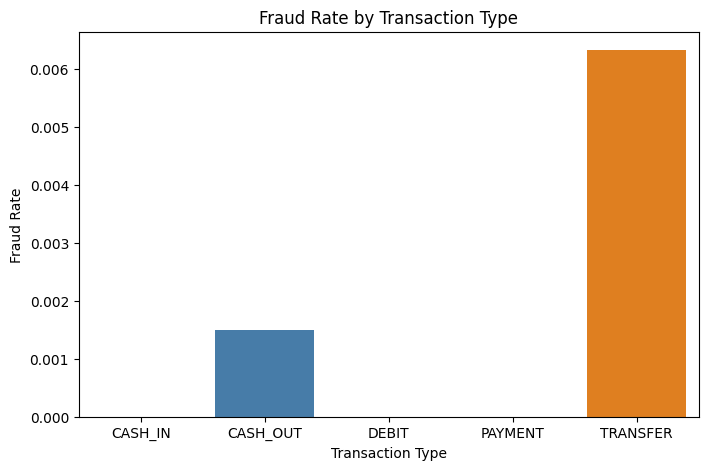

In [ ]:
fraud_by_type = df.groupby('type')['isFraud'].mean()

# Plotting fraud rate by transaction type
plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values, palette='Set1')
plt.title('Fraud Rate by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')
plt.show()

## above we can fraud is more likely transfer and cash out transaction

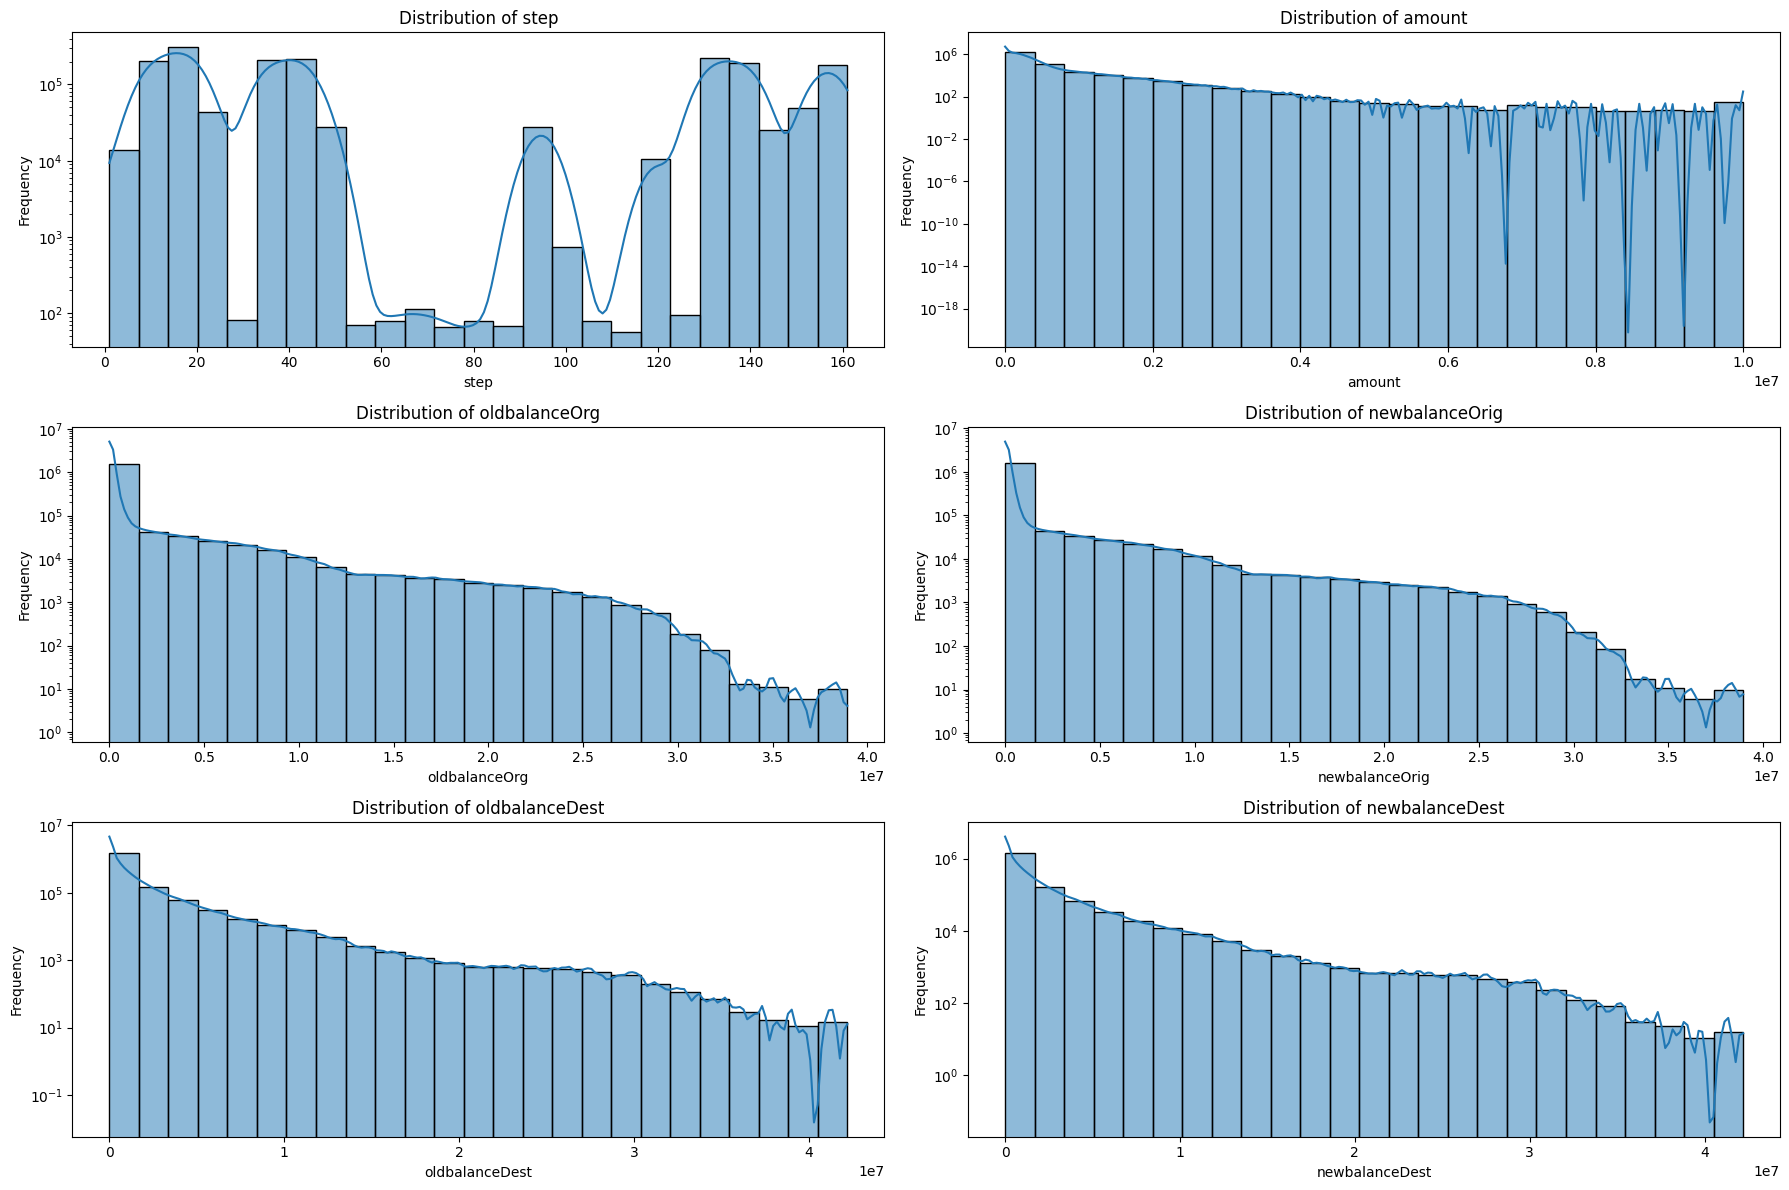

In [ ]:
numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(18, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], bins=25, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.yscale('log')
plt.tight_layout()
plt.show()

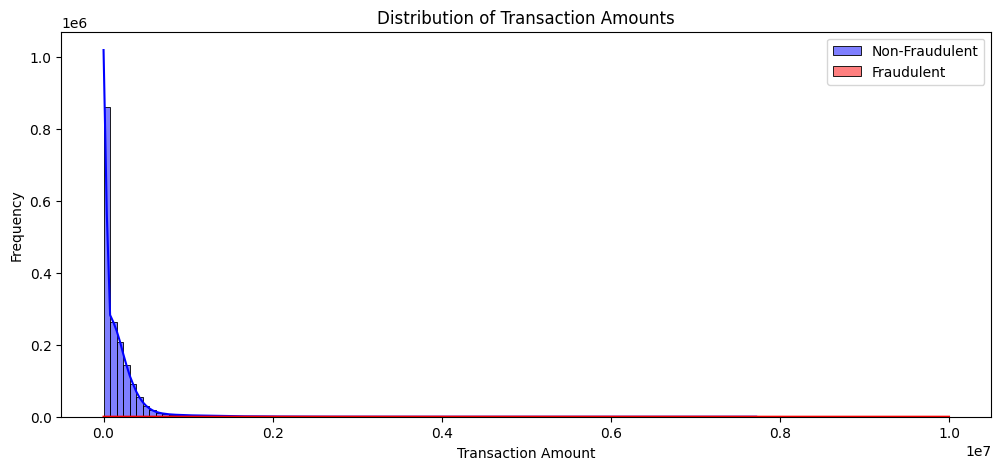

In [ ]:
# Distribution of transaction amounts
plt.figure(figsize=(12, 5))
sns.histplot(df[df['isFraud'] == 0]['amount'], bins=100, color='blue', label='Non-Fraudulent', kde=True)
sns.histplot(df[df['isFraud'] == 1]['amount'], bins=100, color='red', label='Fraudulent', kde=True)
plt.legend()
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

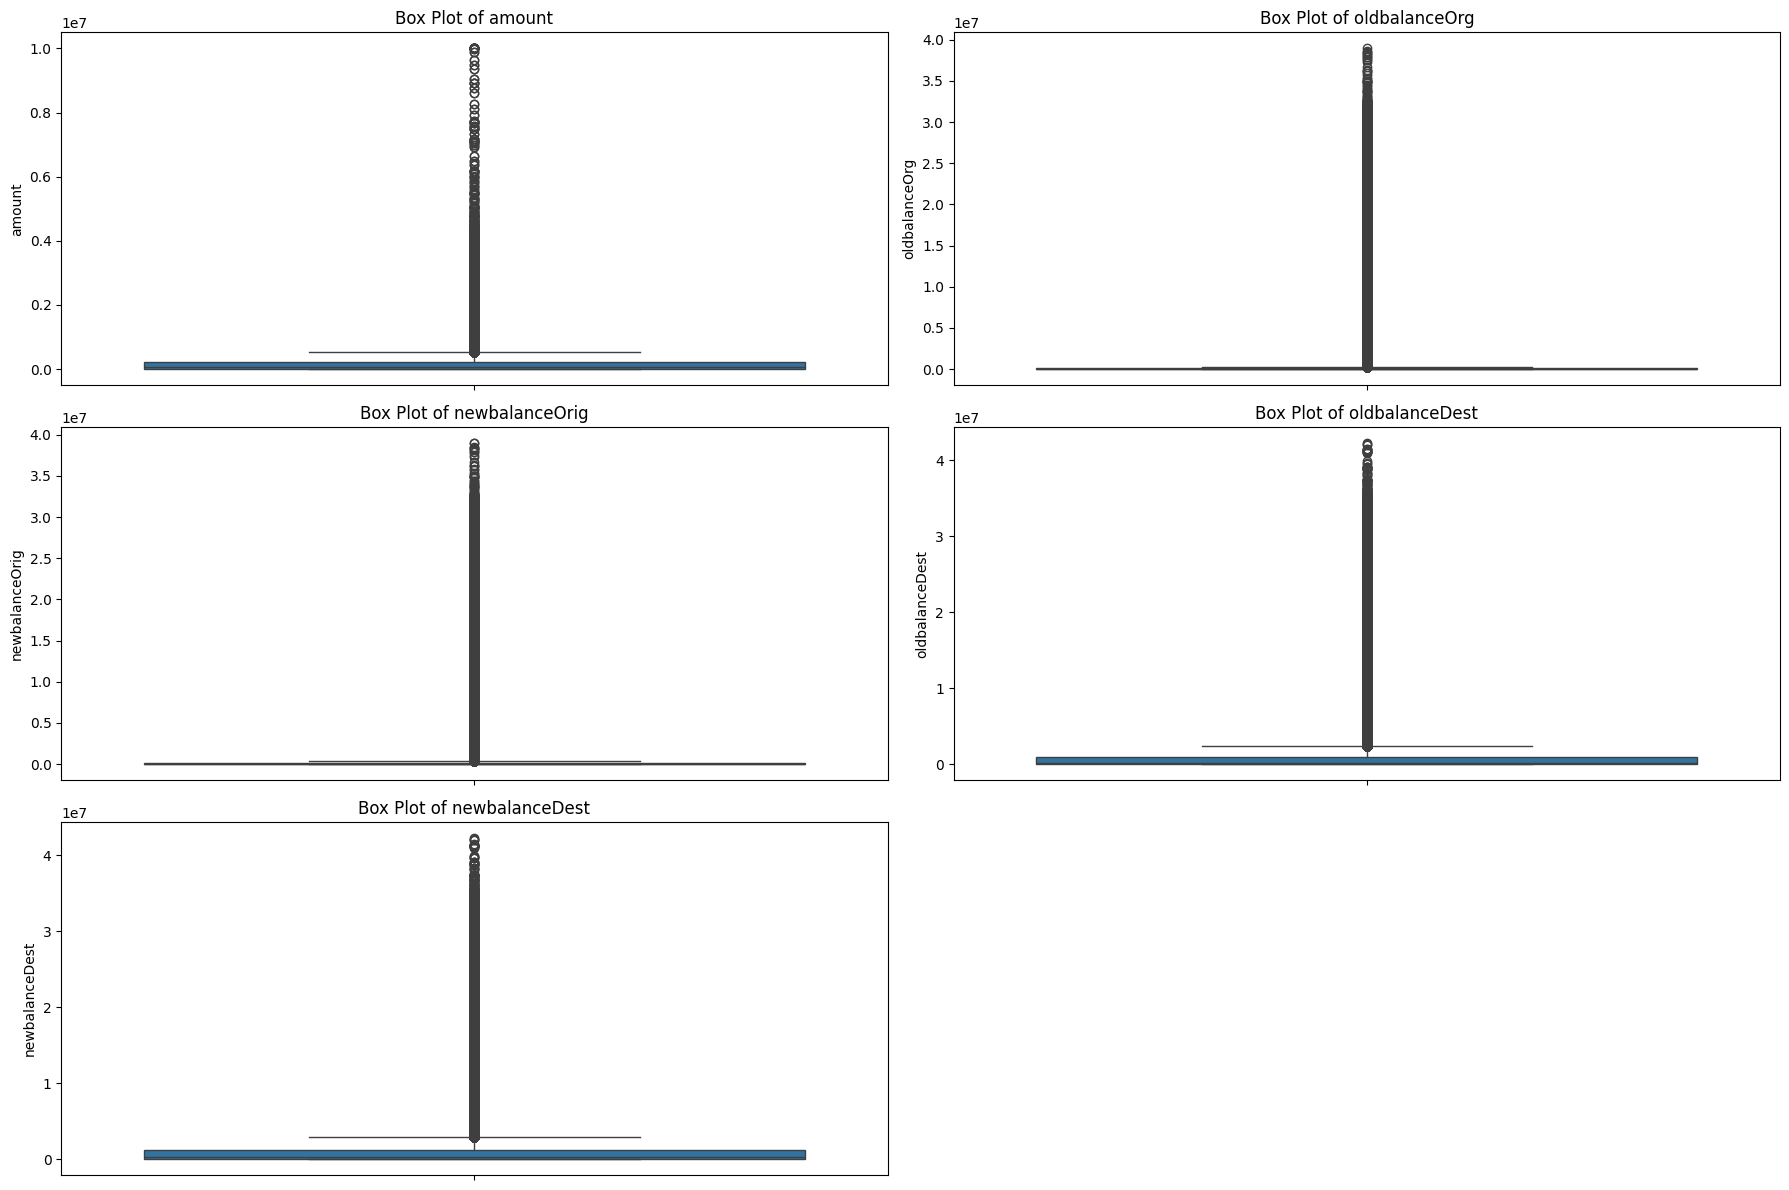

In [ ]:
num_col = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(18, 12))

for i, column in enumerate(num_col, 1):
  plt.subplot(3,2,i)
  sns.boxplot(df[column])
  plt.title(f'Box Plot of {column}')
  plt.tight_layout()
plt.show()

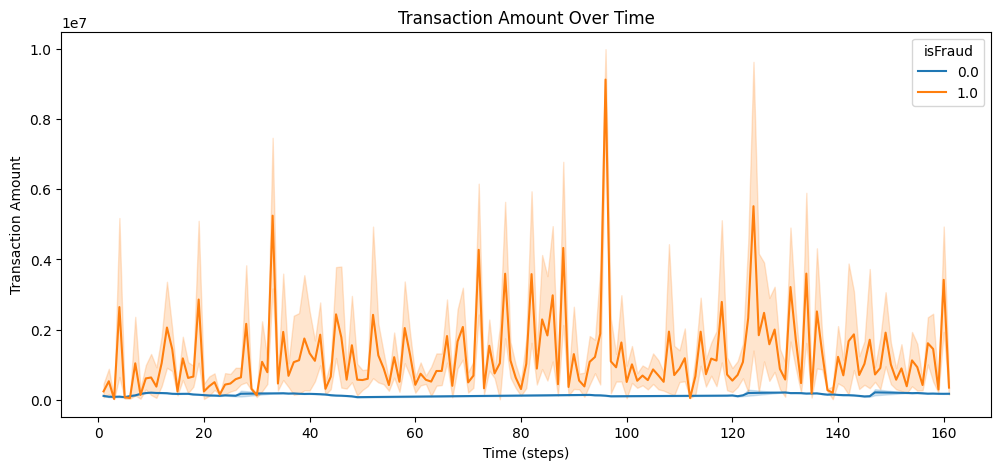

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='step', y='amount', hue='isFraud')
plt.title('Transaction Amount Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Transaction Amount')
plt.show()

# Data Preprocessing and Feature Engineering

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse=False, drop='first')

ohe_df = pd.DataFrame(ohe.fit_transform(df[['type']]), columns=ohe.get_feature_names_out(['type']))

df = pd.concat([df, ohe_df], axis=1)

In [ ]:
df.drop('type', axis=1, inplace=True)

In [ ]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


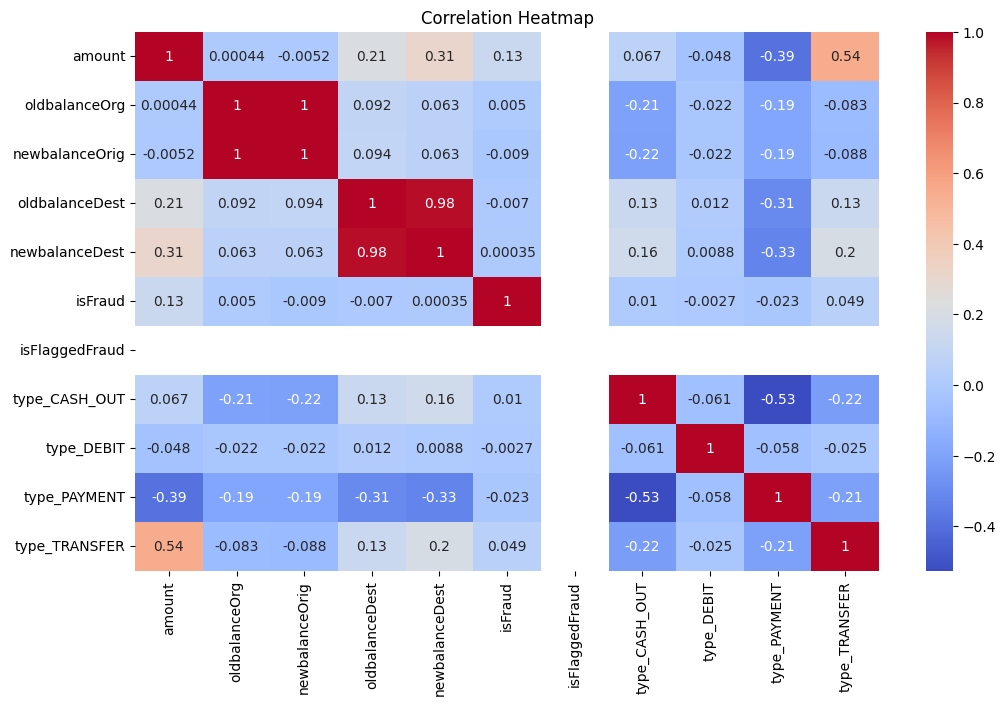

In [ ]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
                     'isFraud', 'isFlaggedFraud', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']].corr()

plt.figure(figsize=(12, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
skewness_values = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].skew()
skewness_values

,0
amount,6.335844
oldbalanceOrg,5.112117
newbalanceOrig,5.046531
oldbalanceDest,5.343560
newbalanceDest,5.028200


In [ ]:
df['amount'] = np.log1p(df['amount'])
df['oldbalanceOrg'] = np.log1p(df['oldbalanceOrg'])
df['newbalanceOrig'] = np.log1p(df['newbalanceOrig'])
df['oldbalanceDest'] = np.log1p(df['oldbalanceDest'])
df['newbalanceDest'] = np.log1p(df['newbalanceDest'])

In [ ]:
skewness_values_after = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].skew()
print(skewness_values_after)


amount           -0.606986
oldbalanceOrg    -0.269379
newbalanceOrig    0.413998
oldbalanceDest   -0.241594
newbalanceDest   -0.393757
dtype: float64


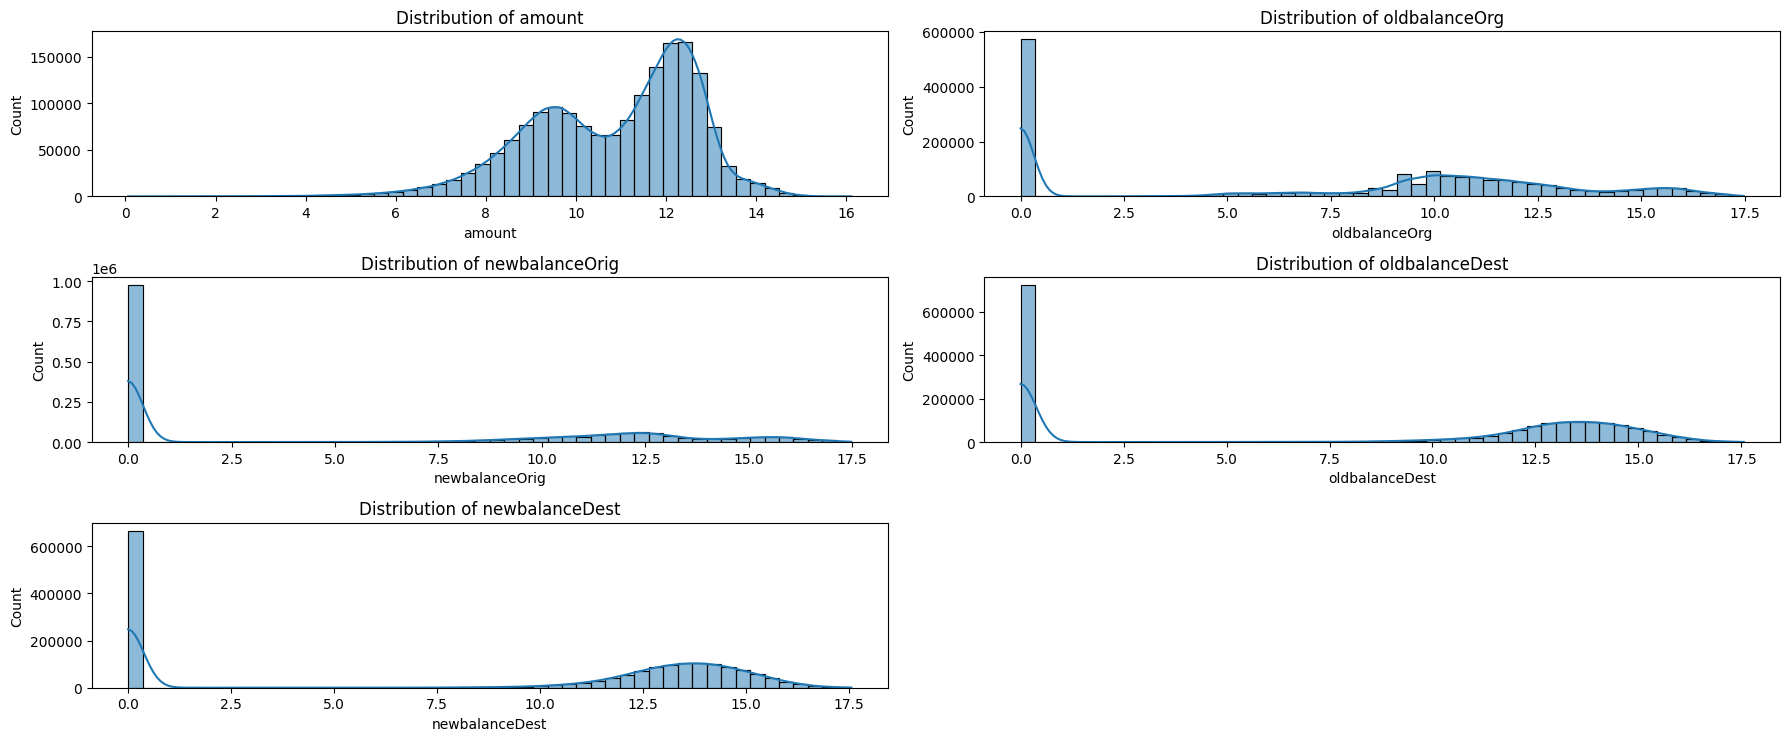

In [ ]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[column], bins=50, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [ ]:
df.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1, inplace=True)

In [ ]:
df['isFraud'] = df['isFraud'].astype(int)

In [ ]:
df.head(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9.194276,12.044359,11.984786,0.0,0.0,0,0.0,0.0,1.0,0.0
1,1,7.531166,9.964112,9.872292,0.0,0.0,0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
columns_to_scale = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

scaler = StandardScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [ ]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,-0.915509,0.801288,1.023841,-1.162091,-1.249885,0,0.0,0.0,1.0,0.0
1,1,-1.831615,0.436528,0.692229,-1.162091,-1.249885,0,0.0,0.0,1.0,0.0
2,1,-3.113507,-0.398131,-0.857488,-1.162091,-1.249885,1,0.0,0.0,0.0,1.0
3,1,-3.113507,-0.398131,-0.857488,0.323324,-1.249885,1,1.0,0.0,0.0,0.0
4,1,-0.821631,0.554124,0.760181,-1.162091,-1.249885,0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,precision_recall_curve
from imblearn.over_sampling import SMOTE

In [ ]:
x = df.drop('isFraud', axis=1)
y = df['isFraud']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x.head(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,-0.915509,0.801288,1.023841,-1.162091,-1.249885,0.0,0.0,1.0,0.0
1,1,-1.831615,0.436528,0.692229,-1.162091,-1.249885,0.0,0.0,1.0,0.0


In [ ]:
y.head(2), y.value_counts()

(0    0
 1    0
 Name: isFraud, dtype: int64,
 isFraud
 0    1736485
 1       1844
 Name: count, dtype: int64)

# Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)

0.9993113253289284

In [ ]:
lr_pred = lr.predict(x_test)
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred)}")
print(f"Precision: {precision_score(y_test, lr_pred)}")
print(f"Recall: {recall_score(y_test, lr_pred)}")
print(f"F1 Score: {f1_score(y_test, lr_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))

Logistic Regression Evaluation:
Accuracy: 0.999359538560956
Precision: 0.9433962264150944
Recall: 0.3831417624521073
F1 Score: 0.5449591280653951
Confusion Matrix:
[[520965     12]
 [   322    200]]


# Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_train, y_train)

1.0

In [ ]:
rf_pred = rf.predict(x_test)
print("\nRandom Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")
print(f"Precision: {precision_score(y_test, rf_pred)}")
print(f"Recall: {recall_score(y_test, rf_pred)}")
print(f"F1 Score: {f1_score(y_test, rf_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))


Random Forest Evaluation:
Accuracy: 0.9997296255601641
Precision: 0.9680589680589681
Recall: 0.7547892720306514
F1 Score: 0.8482238966630786
Confusion Matrix:
[[520964     13]
 [   128    394]]


# Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb.score(x_train, y_train)

0.9990705357362984

In [ ]:
gb_pred = gb.predict(x_test)
print("\nGradient Boosting Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, gb_pred)}")
print(f"Precision: {precision_score(y_test, gb_pred)}")
print(f"Recall: {recall_score(y_test, gb_pred)}")
print(f"F1 Score: {f1_score(y_test, gb_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_pred))


Gradient Boosting Classifier Evaluation:
Accuracy: 0.9991006694164323
Precision: 0.7849462365591398
Recall: 0.13984674329501914
F1 Score: 0.23739837398373984
Confusion Matrix:
[[520957     20]
 [   449     73]]


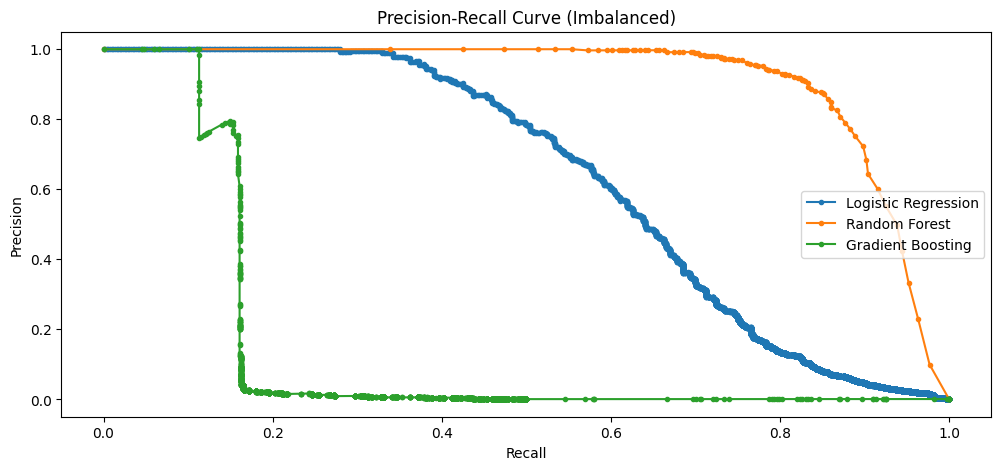

In [ ]:
plt.figure(figsize=(12, 5))

lr_probs = lr.predict_proba(x_test)[:, 1]
rf_probs = rf.predict_proba(x_test)[:, 1]
gb_probs = gb.predict_proba(x_test)[:, 1]

# Step 3: Plot the Precision-Recall curves
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_probs)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_probs)
precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_probs)

plt.plot(recall_lr, precision_lr, marker='.', label='Logistic Regression')
plt.plot(recall_rf, precision_rf, marker='.', label='Random Forest')
plt.plot(recall_gb, precision_gb, marker='.', label='Gradient Boosting')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Imbalanced)')
plt.legend()
plt.show()

# i already know aur data imbalanced


In [ ]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
y_train_smote.value_counts()

,count
isFraud,
0,1215508
1,1215508


In [ ]:
lr_smote = LogisticRegression()
lr_smote.fit(x_train_smote, y_train_smote)
lr_smote.score(x_train_smote, y_train_smote)

0.9518407118669725

In [ ]:
lr_smote_pred = lr_smote.predict(x_test)
print("Logistic Regression with SMOTE")
print("Accuracy:", accuracy_score(y_test, lr_smote_pred))
print("Precision:", precision_score(y_test, lr_smote_pred))
print("Recall:", recall_score(y_test, lr_smote_pred))
print("F1 Score:", f1_score(y_test, lr_smote_pred))

Logistic Regression with SMOTE
Accuracy: 0.9250449185904479
Precision: 0.012907625855666979
Recall: 0.9789272030651341
F1 Score: 0.025479294956495726


In [ ]:
rf_smote = RandomForestClassifier()
rf_smote.fit(x_train_smote, y_train_smote)
rf_smote.score(x_train_smote, y_train_smote)

1.0

In [ ]:
rf_smote_pred = rf_smote.predict(x_test)
print("Random Forest with SMOTE")
print("Accuracy:", accuracy_score(y_test, rf_smote_pred))
print("Precision:", precision_score(y_test, rf_smote_pred))
print("Recall:", recall_score(y_test, rf_smote_pred))
print("F1 Score:", f1_score(y_test, rf_smote_pred))

Random Forest with SMOTE
Accuracy: 0.9989491830281554
Precision: 0.487
Recall: 0.9329501915708812
F1 Score: 0.6399474375821287


In [ ]:
gb_smote = GradientBoostingClassifier()
gb_smote.fit(x_train_smote, y_train_smote)
gb_smote.score(x_train_smote, y_train_smote)

0.9844850877164115

In [ ]:
gb_smote_pred = gb_smote.predict(x_test)
print("Gradient Boosting with SMOTE")
print("Accuracy:", accuracy_score(y_test, gb_smote_pred))
print("Precision:", precision_score(y_test, gb_smote_pred))
print("Recall:", recall_score(y_test, gb_smote_pred))
print("F1 Score:", f1_score(y_test, gb_smote_pred))

Gradient Boosting with SMOTE
Accuracy: 0.9826020759387841
Precision: 0.05403150099092521
Recall: 0.9923371647509579
F1 Score: 0.10248293599762588


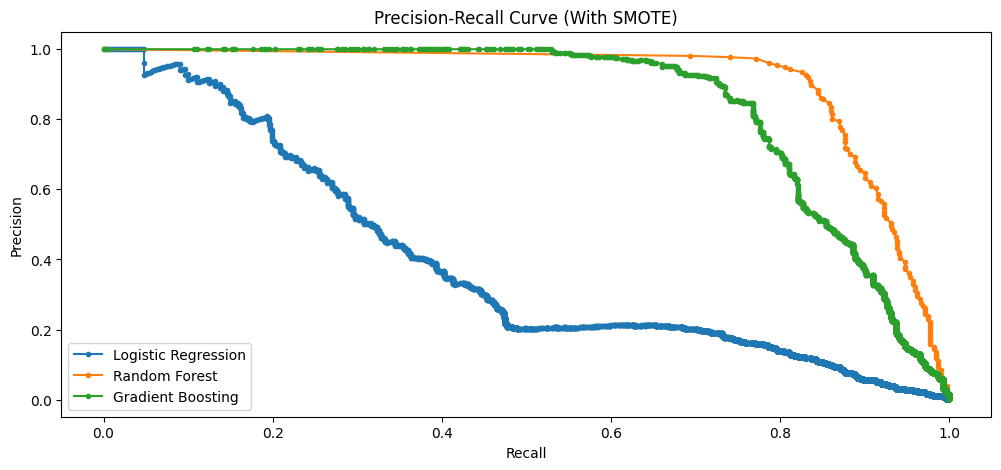

In [ ]:
plt.figure(figsize=(12, 5))

lr_pred_proba = lr_smote.predict_proba(x_test)[:, 1]
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_pred_proba)
plt.plot(recall_lr, precision_lr, marker='.', label='Logistic Regression')

# Random Forest Precision-Recall with SMOTE
rf_pred_proba = rf_smote.predict_proba(x_test)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_pred_proba)
plt.plot(recall_rf, precision_rf, marker='.', label='Random Forest')

# Gradient Boosting Precision-Recall with SMOTE
gb_pred_proba = gb_smote.predict_proba(x_test)[:, 1]
precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_pred_proba)
plt.plot(recall_gb, precision_gb, marker='.', label='Gradient Boosting')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (With SMOTE)')
plt.legend()
plt.show()

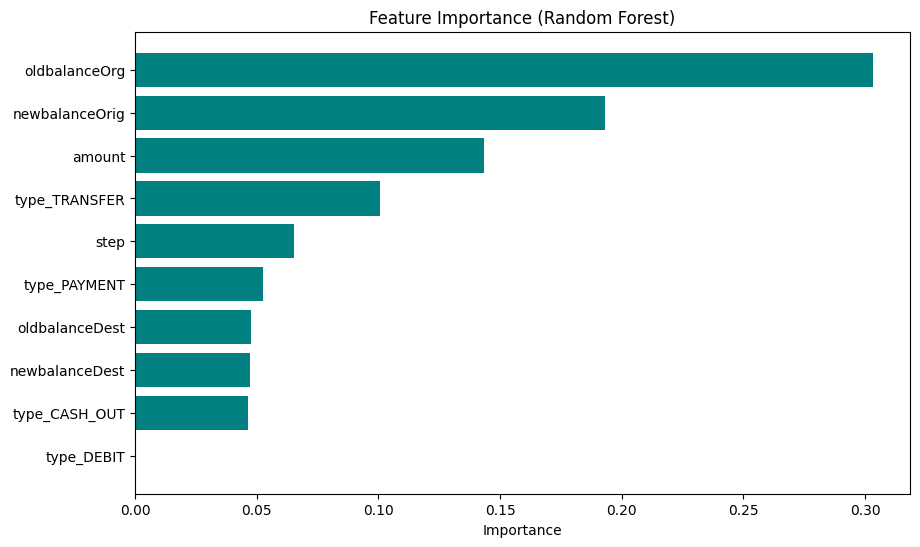

In [ ]:
importances = rf_smote.feature_importances_
features = x.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
importance_df

,Feature,Importance
2,oldbalanceOrg,0.303386
3,newbalanceOrig,0.192998
1,amount,0.143436
9,type_TRANSFER,0.100688
0,step,0.065268
8,type_PAYMENT,0.052722
4,oldbalanceDest,0.047799
5,newbalanceDest,0.047061
6,type_CASH_OUT,0.046373
7,type_DEBIT,0.000269
